In [111]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score


In [50]:
df = pd.read_csv('D:\Project\Churn Modeling.csv')

In [51]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df['CustomerId'].duplicated().sum()

np.int64(0)

### There are no duplicate customers 

In [53]:
df1 = df.copy() 

In [54]:
df1.drop(['RowNumber'],axis = 1,inplace=True)
df1.drop(['CustomerId'],axis = 1,inplace = True)
df1.drop(['Surname'],axis = 1,inplace = True)

In [55]:
np.unique(df1['Geography'])

array(['France', 'Germany', 'Spain'], dtype=object)

In [56]:
df1.shape

(10000, 11)

In [57]:
df1.duplicated().sum()

np.int64(0)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [59]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [60]:
df1.columns.to_list()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [61]:
df1['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

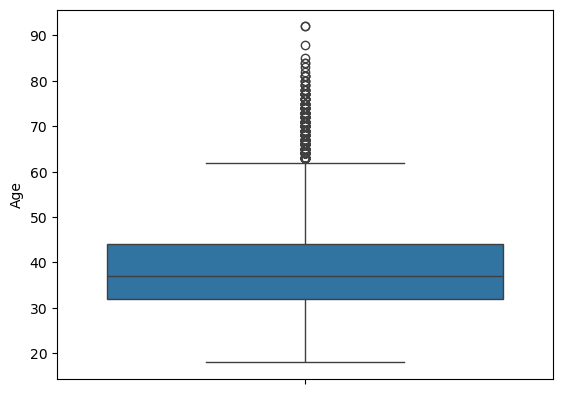

In [62]:
sns.boxplot(df['Age'])

<Axes: ylabel='Frequency'>

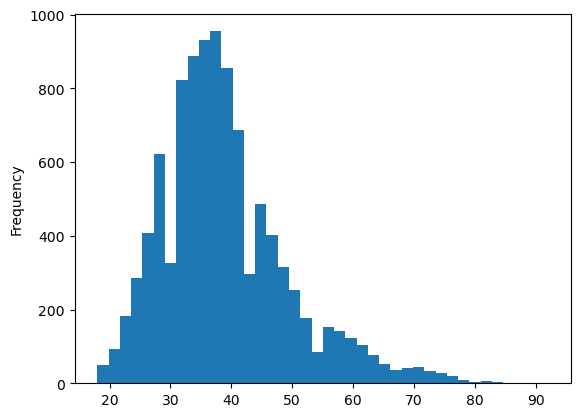

In [63]:
df1['Age'].plot(kind = 'hist',bins = 40)

<Axes: ylabel='Density'>

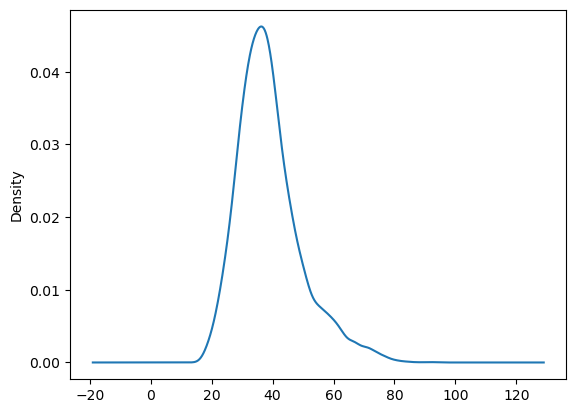

In [64]:
df1['Age'].plot(kind = 'kde')

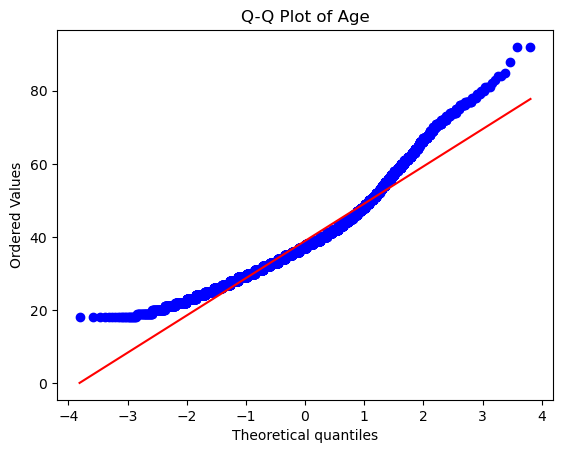

In [65]:
age_data = df1['Age']
stats.probplot(age_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Age")
plt.show()

In [66]:
df1['Age'].skew()

np.float64(1.0113202630234552)

### Age
it is higly skewed towards right side with skewness of 1.0113202630234552

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [68]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<Axes: >

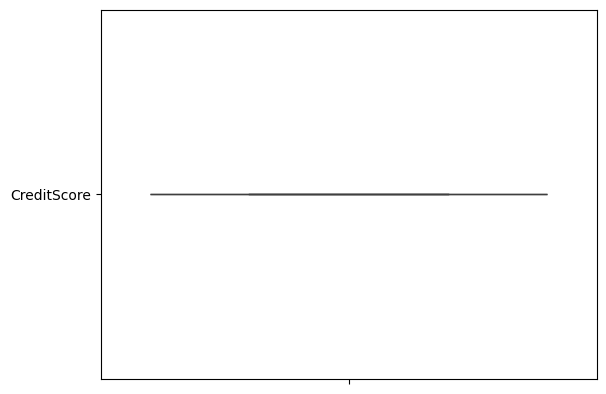

In [69]:
sns.boxplot(['CreditScore'])

<Axes: ylabel='Frequency'>

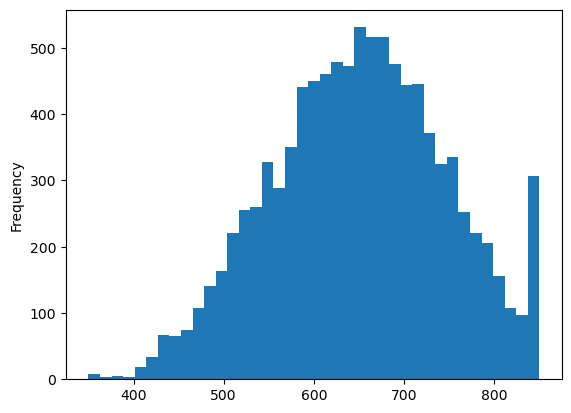

In [70]:
df['CreditScore'].plot(kind='hist',bins = 39)

<Axes: ylabel='Density'>

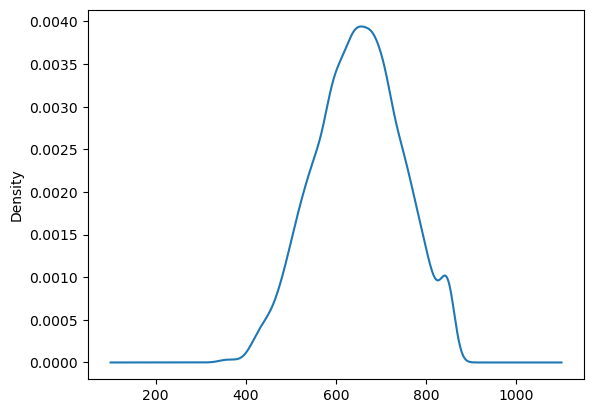

In [71]:
df1['CreditScore'].plot(kind='kde')

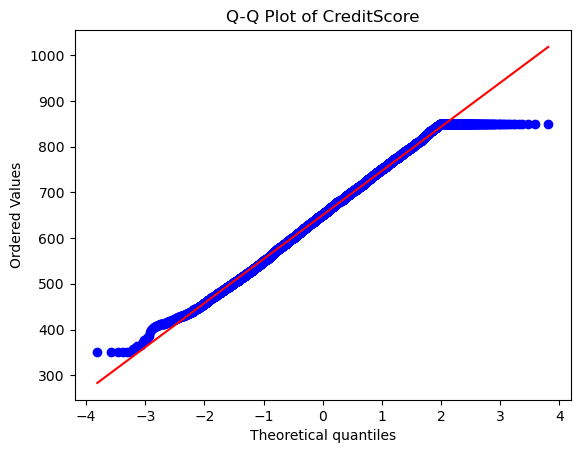

In [72]:
age_data = df1['CreditScore']
stats.probplot(age_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of CreditScore")
plt.show()

In [73]:
df1['CreditScore'].skew()

np.float64(-0.07160660820092675)

### Credit Scorce
it is normally distributed 

In [74]:
df1['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

<Axes: ylabel='Tenure'>

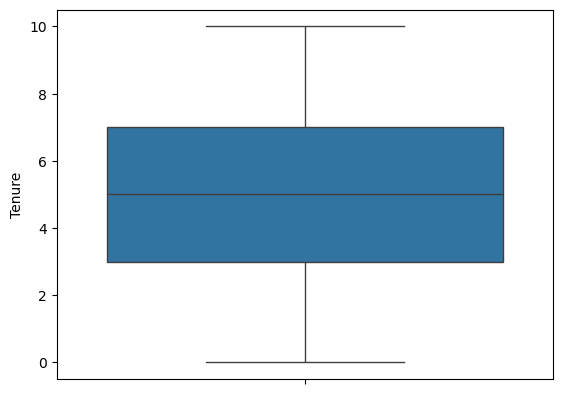

In [75]:
sns.boxplot(df['Tenure'])

<Axes: ylabel='Density'>

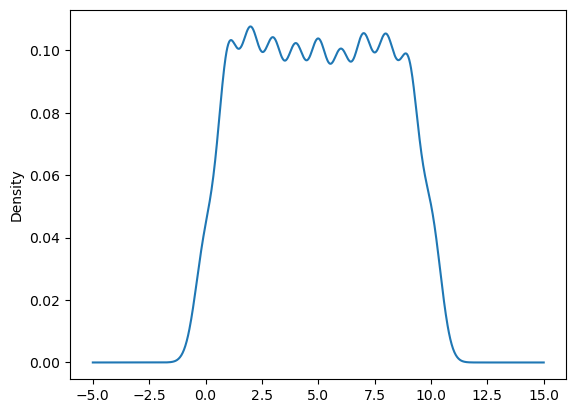

In [76]:
df1['Tenure'].plot(kind = 'kde')

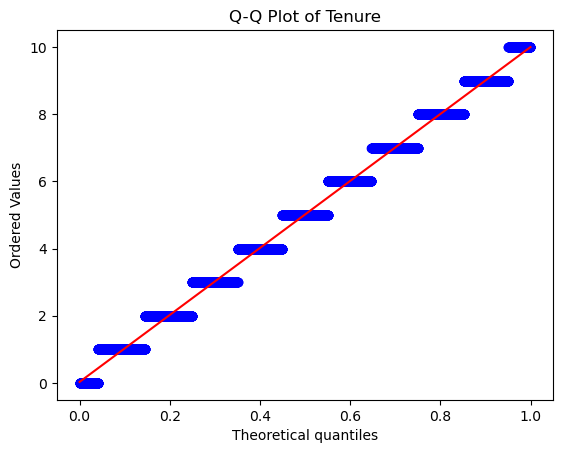

In [77]:
age_data = df1['Tenure']
stats.probplot(age_data, dist="uniform", plot=plt)
plt.title("Q-Q Plot of Tenure")
plt.show()

In [78]:
from scipy.stats import chisquare
obs = df1['Tenure'].value_counts().sort_index().values  
exp = [len(df1) / len(obs)] * len(obs)  
chi2, p = chisquare(f_obs=obs, f_exp=exp)
print("Chi-square statistic:", chi2)
print("p-value:", p)

if p > 0.05:
    print("Fail to reject H0 → Tenure distribution matches expected distribution.")
else:
    print("Reject H0 → Tenure distribution does NOT match expected distribution.")

Chi-square statistic: 572.4277999999999
p-value: 1.4175059655001297e-116
Reject H0 → Tenure distribution does NOT match expected distribution.


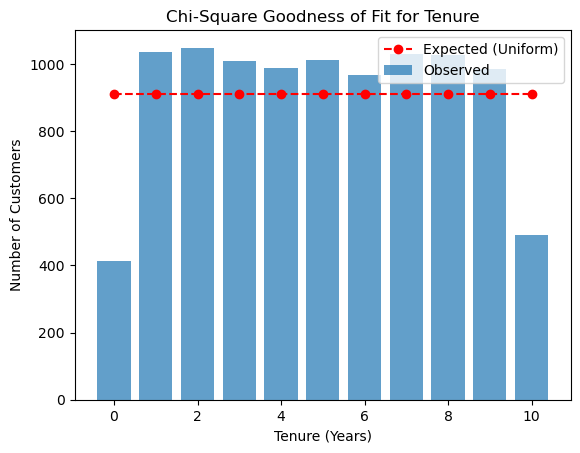

In [79]:

obs = df1['Tenure'].value_counts().sort_index()
exp = [len(df1) / len(obs)] * len(obs)
plt.bar(obs.index, obs.values, alpha=0.7, label="Observed")
plt.plot(obs.index, exp, 'ro--', label="Expected (Uniform)")
plt.xlabel("Tenure (Years)")
plt.ylabel("Number of Customers")
plt.legend()
plt.title("Chi-Square Goodness of Fit for Tenure")
plt.show()


In [80]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [81]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(df1['Tenure'], df['Exited'])

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

if p > 0.05:
    print("Fail to reject H0 → Tenure and Exited are independent (no relationship).")
else:
    print("Reject H0 → Tenure and Exited are dependent (there is a relationship).")


Chi-square statistic: 13.900372600390284
Degrees of freedom: 10
p-value: 0.17758462026413294
Fail to reject H0 → Tenure and Exited are independent (no relationship).


### Tenure 
this shows that the tenure is almost uniform expect tenure 0 and tenure 10 as they are 10 types only small changes will give a big impact so statistically it will consider as uniform distribution

In [82]:
df1['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<Axes: ylabel='Balance'>

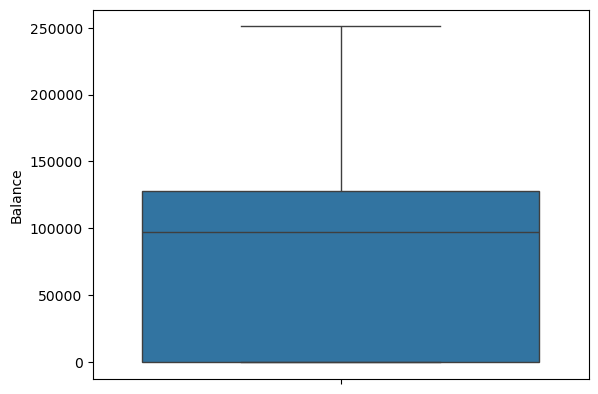

In [83]:
sns.boxplot(df1['Balance'])

<Axes: ylabel='Frequency'>

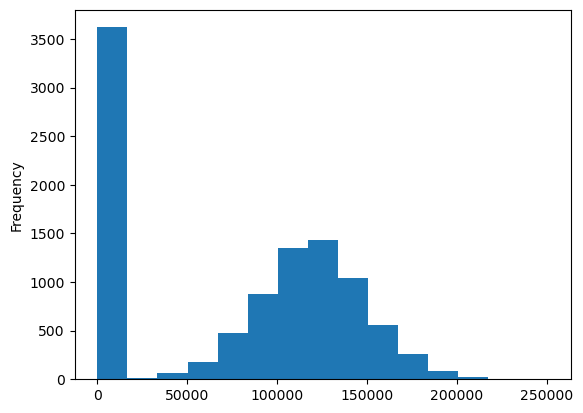

In [84]:
df['Balance'].plot(kind = 'hist',bins =15)

<Axes: ylabel='Density'>

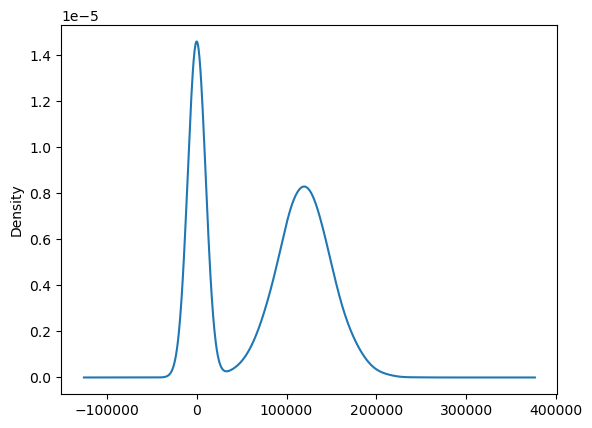

In [85]:
df1['Balance'].plot(kind = 'kde')

In [86]:
df1['Balance'][df['Balance']>0].count()

np.int64(6383)

### Balance
more than half of the them have no money in this bank and rest follows normal distribution

as K Means is using Euclidean distance can so all the feature should be in same units 


In [87]:
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df1[num_features] = scaler.fit_transform(df1[num_features])

In [88]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,-4.824585e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,0.70550,0.515100,-2.877698e-17,0.203700
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.45584,0.499797,1.000050e+00,0.402769
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-1.740268e+00,0.000000
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-8.535935e-01,0.000000
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,1.00000,1.000000,1.802807e-03,0.000000
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,1.00000,1.000000,8.572431e-01,0.000000
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,1.00000,1.000000,1.737200e+00,1.000000


## Categorical Data

In [89]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

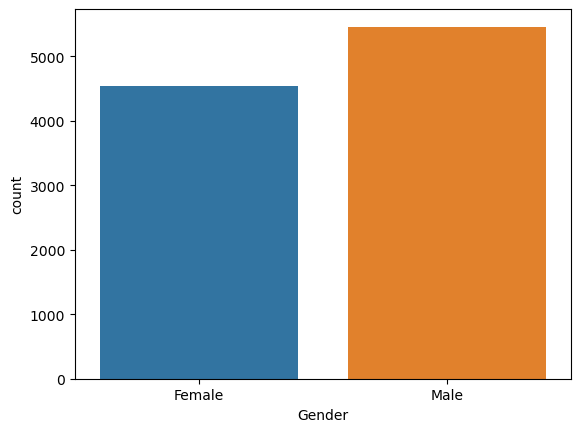

In [90]:
sns.countplot(data=df1, x='Gender', hue = 'Gender')
plt.show()

In [91]:
# Label encoding for Gender
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])

In [92]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

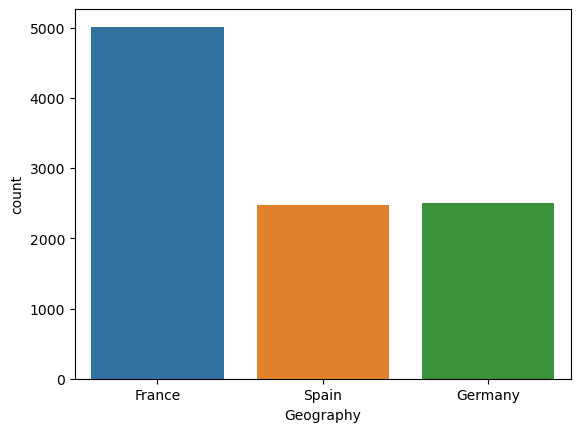

In [93]:
sns.countplot(data=df1, x='Geography', hue = 'Geography')
plt.show()

This shows that 50% of bank customers are from France and rest 25% and 25%  are from spain and Germany

In [94]:
### One hot encoding for Geograph
geo_encoded = pd.get_dummies(df1['Geography'], prefix='Geo', drop_first=True)
df1 = pd.concat([df1.drop('Geography', axis=1), geo_encoded], axis=1)

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  float64
 3   Tenure           10000 non-null  float64
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  float64
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Geo_Germany      10000 non-null  bool   
 11  Geo_Spain        10000 non-null  bool   
dtypes: bool(2), float64(6), int64(4)
memory usage: 800.9 KB


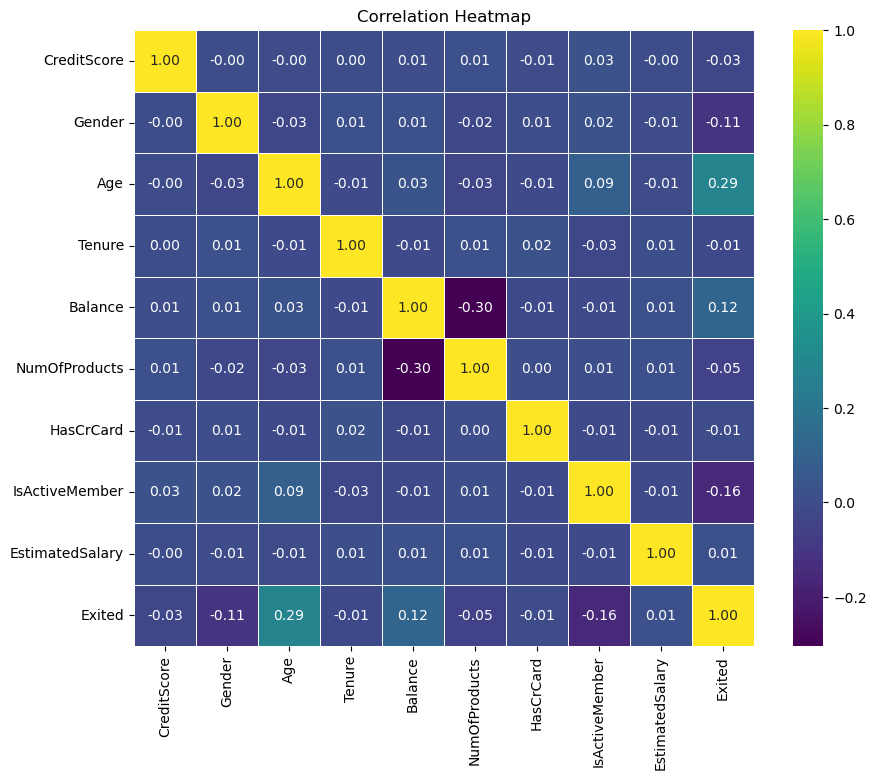

In [98]:
plt.figure(figsize=(10,8))
corr = temp_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [100]:
# 3. Split features & target
X = df1.drop('Exited', axis=1)
y = df1['Exited']

In [101]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [102]:
# 5. Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [103]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 11)
Test shape: (2000, 11)


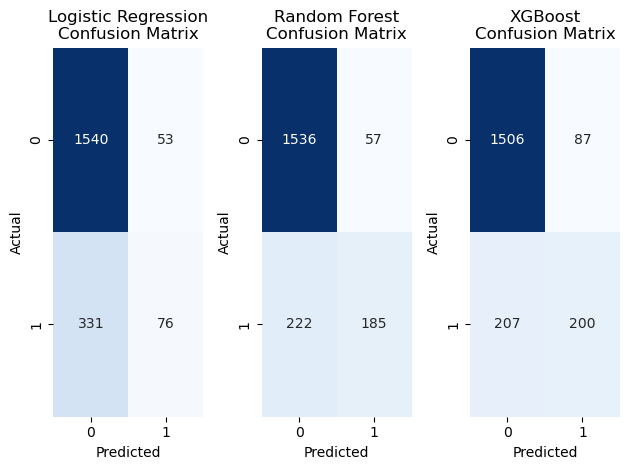

In [113]:
# ---------------- Confusion Matrices ----------------
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_scaled if name=="Logistic Regression" else X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name}\nConfusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    # Store metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, model.predict_proba(X_test_scaled if name=="Logistic Regression" else X_test)[:,1])
    }

plt.tight_layout()
plt.show()

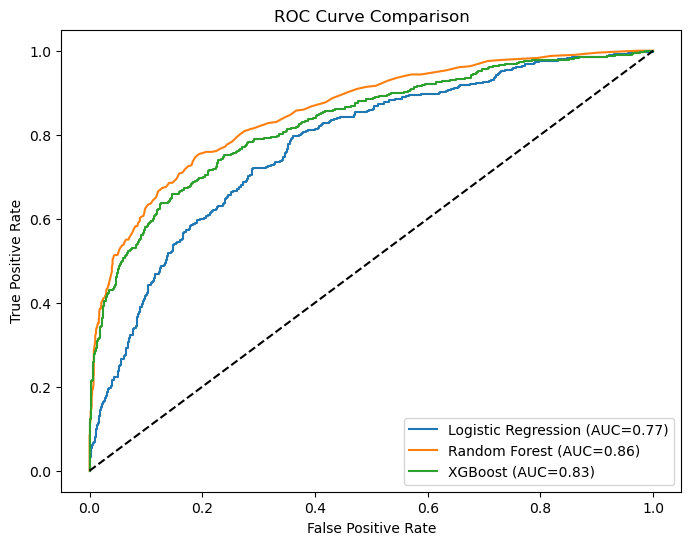

In [114]:
# ---------------- ROC Curves ----------------
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled if name=="Logistic Regression" else X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = results[name]["AUC"]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

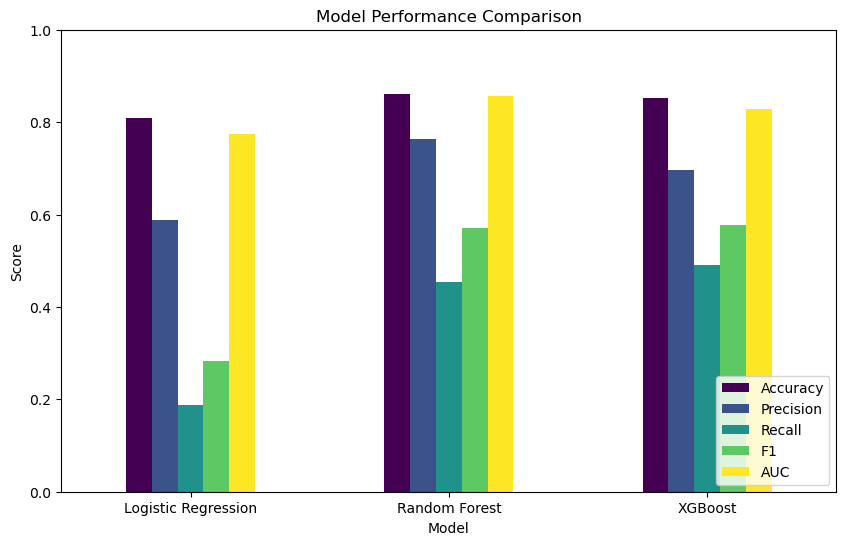

In [115]:
# ---------------- Metrics Bar Plot ----------------
metrics_df = (pd.DataFrame(results)
              .T
              .reset_index()
              .rename(columns={"index":"Model"}))

metrics_df.plot(x="Model", kind="bar", figsize=(10,6), colormap="viridis", rot=0)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [118]:
import joblib

# Train final model on full training data
rf.fit(X_train, y_train)

# Save model
joblib.dump(rf, "random_forest_churn.pkl")

print("Random Forest model saved successfully!")

Random Forest model saved successfully!
